In [22]:
import pandas as pd

# Load the dataset

df = pd.read_csv('electricity_bill_dataset.csv')

df.info(), df.describe(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


(None,
                 Fan  Refrigerator  AirConditioner    Television       Monitor  \
 count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
 mean      13.990694     21.705458        1.503959     12.502635      2.865057   
 std        5.470816      1.672575        1.115482      5.756007      3.894933   
 min        5.000000     17.000000        0.000000      3.000000      1.000000   
 25%        9.000000     22.000000        1.000000      7.000000      1.000000   
 50%       14.000000     22.000000        2.000000     13.000000      1.000000   
 75%       19.000000     23.000000        2.000000     17.000000      1.000000   
 max       23.000000     23.000000        3.000000     22.000000     12.000000   
 
        MotorPump         Month  MonthlyHours    TariffRate  ElectricityBill  
 count    45345.0  45345.000000  45345.000000  45345.000000     45345.000000  
 mean         0.0      6.488058    515.083207      8.369648      4311.771307  
 std          0.

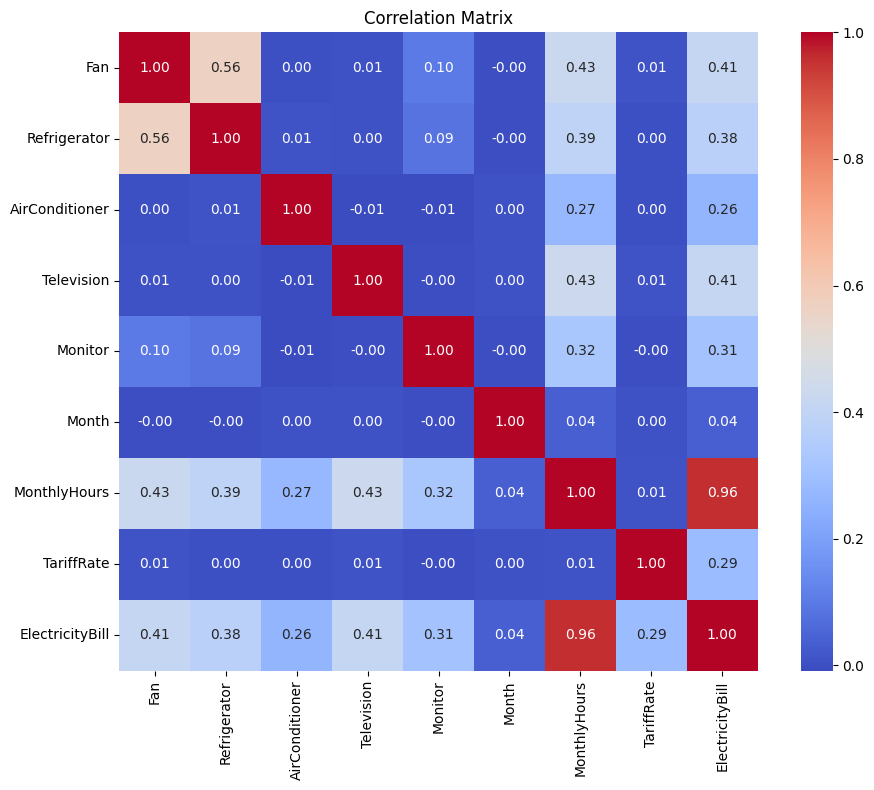

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("electricity_bill_dataset.csv")

# Drop non-numeric and constant columns (like object types and 'MotorPump' if it's constant)
numeric_df = df.drop(columns=["City", "Company", "MotorPump"])


correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [31]:
X_full = df[['MonthlyHours']]
Y_full = df['ElectricityBill']

# Train-Test Split (optional if required, else on full data)
model_full = LinearRegression()
model_full.fit(X_full, Y_full)

Y_full_pred = model_full.predict(X_full)

# Mean Squared Error
mse_full = mean_squared_error(Y_full, Y_full_pred)

# Cost function (which is MSE / 2)
cost_full = mse_full / 2

print(f"Full Dataset MSE: {mse_full}")
print(f"Full Dataset Cost Function (MSE/2): {cost_full}")

Full Dataset MSE: 93283.66043788918
Full Dataset Cost Function (MSE/2): 46641.83021894459


Task 02

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

df=pd.read_csv("cancer_patient_data_sets.csv")

In [5]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [8]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [12]:
le=LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column]=le.fit_transform(df[column])

X = df.drop('Level', axis=1)
y = df['Level']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       0.99      0.99      0.99       248
           2       0.99      0.99      0.99       269

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



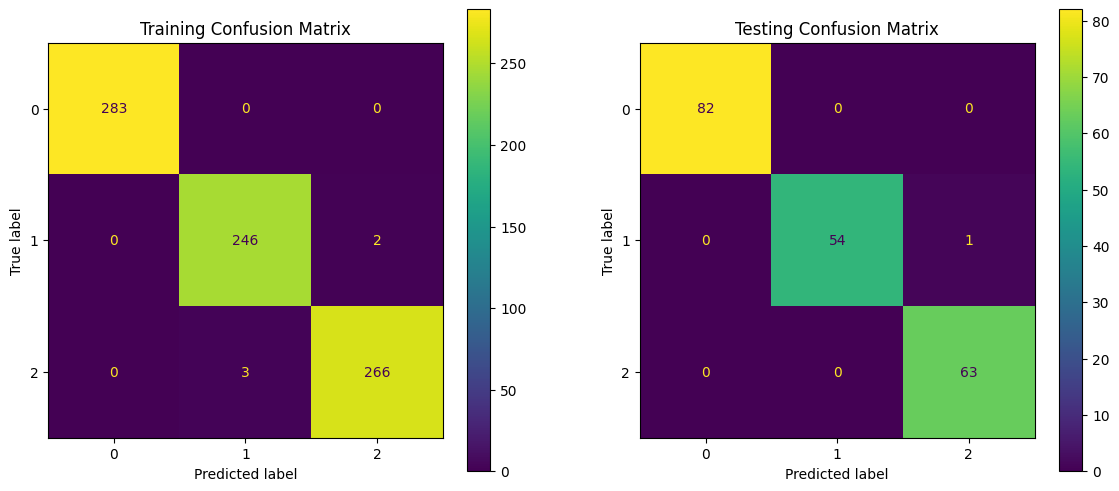

In [17]:

print("Training Classification Report:\n", classification_report(y_train, y_train_pred_lr))
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_lr))

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_lr, ax=axes[0])
axes[0].set_title("Training Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr, ax=axes[1])
axes[1].set_title("Testing Confusion Matrix")

plt.show()


In [18]:
# Training and Testing Accuracy
lr_train_acc = accuracy_score(y_train, y_train_pred_lr)
lr_test_acc = accuracy_score(y_test, y_test_pred_lr)

print(f"Logistic Regression - Training Accuracy: {lr_train_acc:.2f}")
print(f"Logistic Regression - Testing Accuracy: {lr_test_acc:.2f}")



Logistic Regression - Training Accuracy: 0.99
Logistic Regression - Testing Accuracy: 0.99


In [19]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)


In [20]:
# Collect all accuracies
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree'],
    'Training Accuracy': [
        accuracy_score(y_train, y_train_pred_lr),
        accuracy_score(y_train, y_train_pred_nb),
        accuracy_score(y_train, y_train_pred_dt)
    ],
    'Testing Accuracy': [
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_nb),
        accuracy_score(y_test, y_test_pred_dt)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)



                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression            0.99375             0.995
1          Naive Bayes            0.88875             0.895
2        Decision Tree            1.00000             1.000
